In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
loan4 = pd.read_csv('Cleaned_loan.csv')
loan4.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,Default_Binary,delinq_2yrs_cat,inq_last_6mths_cat,total_rec_late_fee_cat,recoveries_cat,collection_recovery_fee_cat,pub_rec_cat
0,1077501,5000.0,5000.0,4975.0,36,0.1065,162.87,B,10.0,RENT,...,171.62,80559.0,23700.0,0,no,yes,no,no,no,no
1,1077430,2500.0,2500.0,2500.0,60,0.1527,59.83,C,1.0,RENT,...,119.66,80559.0,23700.0,1,no,yes,no,yes,yes,no
2,1077175,2400.0,2400.0,2400.0,36,0.1596,84.33,C,10.0,RENT,...,649.91,80559.0,23700.0,0,no,yes,no,no,no,no
3,1076863,10000.0,10000.0,10000.0,36,0.1349,339.31,C,10.0,RENT,...,357.48,80559.0,23700.0,0,no,yes,yes,no,no,no
4,1075358,3000.0,3000.0,3000.0,60,0.1269,67.79,B,1.0,RENT,...,67.79,80559.0,23700.0,0,no,no,no,no,no,no


In [3]:
loan4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842067 entries, 0 to 842066
Data columns (total 36 columns):
id                             842067 non-null int64
loan_amnt                      842067 non-null float64
funded_amnt                    842067 non-null float64
funded_amnt_inv                842067 non-null float64
term                           842067 non-null int64
int_rate                       842067 non-null float64
installment                    842067 non-null float64
grade                          842067 non-null object
emp_length                     842067 non-null float64
home_ownership                 842067 non-null object
annual_inc                     842067 non-null float64
verification_status            842067 non-null object
purpose                        842067 non-null object
addr_state                     842067 non-null object
dti                            842067 non-null float64
open_acc                       842067 non-null float64
revol_bal         

* We can see the column 'term' is an int. We need to convert it into a string and make it categorical as it has just 2 values - 36 and 60.*

In [4]:
loan4['term'] = loan4['term'].apply(str)

* Dropping the 'addr_state' column as it's not a significant feature.

In [5]:
loan4.drop('addr_state', axis = 1, inplace = True)

In [7]:
loan4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842067 entries, 0 to 842066
Data columns (total 35 columns):
id                             842067 non-null int64
loan_amnt                      842067 non-null float64
funded_amnt                    842067 non-null float64
funded_amnt_inv                842067 non-null float64
term                           842067 non-null object
int_rate                       842067 non-null float64
installment                    842067 non-null float64
grade                          842067 non-null object
emp_length                     842067 non-null float64
home_ownership                 842067 non-null object
annual_inc                     842067 non-null float64
verification_status            842067 non-null object
purpose                        842067 non-null object
dti                            842067 non-null float64
open_acc                       842067 non-null float64
revol_bal                      842067 non-null float64
revol_util      

### We have to scale the columns with 'float' data type to give better accuracy. 

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
transform = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','emp_length','annual_inc','dti','open_acc','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt','tot_cur_bal','total_rev_hi_lim']
loan4[transform] = scaler.fit_transform(loan4[transform])
loan4.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,Default_Binary,delinq_2yrs_cat,inq_last_6mths_cat,total_rec_late_fee_cat,recoveries_cat,collection_recovery_fee_cat,pub_rec_cat
0,1077501,0.130435,0.130435,0.142143,36,0.225180,0.102952,B,1.0,RENT,...,0.004705,0.01007,0.00237,0,no,yes,no,no,no,no
1,1077430,0.057971,0.057971,0.071429,60,0.420363,0.030886,C,0.0,RENT,...,0.003281,0.01007,0.00237,1,no,yes,no,yes,yes,no
2,1077175,0.055072,0.055072,0.068571,36,0.449514,0.048021,C,1.0,RENT,...,0.017818,0.01007,0.00237,0,no,yes,no,no,no,no
3,1076863,0.275362,0.275362,0.285714,36,0.345163,0.226355,C,1.0,RENT,...,0.009801,0.01007,0.00237,0,no,yes,yes,no,no,no
4,1075358,0.072464,0.072464,0.085714,60,0.311365,0.036453,B,0.0,RENT,...,0.001859,0.01007,0.00237,0,no,no,no,no,no,no


* We can see that we have scaled the values of the columns to be between 0 and 1.

### Creating dummy variables from the 'object' data types.

In [10]:
features = ['term','grade','home_ownership','verification_status','purpose','initial_list_status','delinq_2yrs_cat','inq_last_6mths_cat','total_rec_late_fee_cat','recoveries_cat','collection_recovery_fee_cat','pub_rec_cat']
loan4 = pd.get_dummies(loan4, columns = features)
loan4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842067 entries, 0 to 842066
Data columns (total 68 columns):
id                                  842067 non-null int64
loan_amnt                           842067 non-null float64
funded_amnt                         842067 non-null float64
funded_amnt_inv                     842067 non-null float64
int_rate                            842067 non-null float64
installment                         842067 non-null float64
emp_length                          842067 non-null float64
annual_inc                          842067 non-null float64
dti                                 842067 non-null float64
open_acc                            842067 non-null float64
revol_bal                           842067 non-null float64
revol_util                          842067 non-null float64
total_acc                           842067 non-null float64
out_prncp                           842067 non-null float64
out_prncp_inv                       842067 non-null

### Separating the 'id' column so that it doesn't get included while modeling.'

In [11]:
users = loan4['id']

In [12]:
loan4.drop('id', axis = 1, inplace = True)

### Separating target column 'Default_Binary' from the rest of the data. The target variable is put in variable y.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [14]:
X = loan4.loc[:, loan4.columns != 'Default_Binary']
y = loan4.loc[:, loan4.columns == 'Default_Binary']


In [17]:
y['Default_Binary'].value_counts()

0    778411
1     63656
Name: Default_Binary, dtype: int64

* We can see that the distribution of samples in both the loan defaulters (1) and non- defaulters (0) to be very disproportionate. Hence we are going to oversample the dataset using SMOTE library.

### Splitting the data into 70% training set and 30% test set .

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (589446, 66)
Number transactions y_train dataset:  (589446, 1)
Number transactions X_test dataset:  (252621, 66)
Number transactions y_test dataset:  (252621, 1)


* We can see that the total observations in the training set are 589,446. 

In [21]:
sm = SMOTE(random_state=0)

In [22]:
columns_x = X_train.columns
columns_y = y_train.columns
sm_X,sm_y = sm.fit_sample(X_train, y_train.values.ravel())
        

In [23]:
sm_X = pd.DataFrame(data=sm_X,columns=columns_x)
sm_y = pd.DataFrame(data=sm_y,columns=columns_y)

In [24]:
print("length of oversampled data is ",len(sm_X))
print("Number of defaulters",len(sm_y[sm_y['Default_Binary']==1]))
print("Number of non-defaulters",len(sm_y[sm_y['Default_Binary']==0]))


length of oversampled data is  1089672
Number of defaulters 544836
Number of non-defaulters 544836


* We can see that the total observations have increased from 589,446 to 1,089,672.
* Also the distribution of defaulters and non-defaulters are even now.

### Fitting the data into Machine Learning Model.

In [25]:
logreg = LogisticRegression(class_weight = 'balanced', solver = 'sag')

logreg.fit(sm_X,sm_y.values.ravel())

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

In [26]:
y_pred = logreg.predict(X_test)

### Testing the accuracy of the model using Confusion matrix and ROC Curve.

In [30]:
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
confusion_matrix

Accuracy of logistic regression classifier on test set: 0.96


array([[227659,   5916],
       [  5051,  13995]], dtype=int64)

* We can see that total correct predictions = 227659+13995 = 241654, compared to total false predictions = 5916+5051 = 10967.

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98    233575
           1       0.70      0.73      0.72     19046

   micro avg       0.96      0.96      0.96    252621
   macro avg       0.84      0.85      0.85    252621
weighted avg       0.96      0.96      0.96    252621



* We can see that the model is 98% accurate on predicting the 'non-defaulters' but 70% accurate on detecting 'loan defaulters'. 

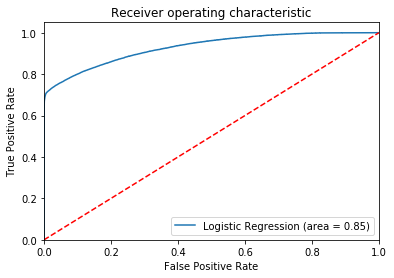

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Following are some test results:

In [36]:
final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['Predictions'] = y_pred
final_results = final_results[['id','Default_Binary','Predictions']]
final_results.head(20)

,id,Default_Binary,Predictions
5,1075269,0.0,0
6,1069639,0.0,0
7,1072053,0.0,0
13,1069866,0.0,0
19,1069742,0.0,0
31,1069539,0.0,0
36,1069361,0.0,0
37,1069357,0.0,0
45,1051117,0.0,0
46,1069465,1.0,1


* As we can see this model predicts pretty well.

In [41]:
import statsmodels.api as st
logit_model=st.Logit(sm_y-1,sm_X, missing='drop')
result=logit_model.fit()
print(result.summary2())

ValueError: endog must be in the unit interval.